# Homework 2 -  Classification and Neural Networks

## *Jingheng Huan*
Netid:  *jh730*

# 1) Mathematical description of NN

### (2.5 points)

Let's assume you have a deep neural network with 10 input neurons, one hidden layer with 50 neurons, and one output layer with 3 neurons. All neurons use the hyperbolic tangent as activation. 

**(a)** What are the dimensions of a pair of feature and target variables $\bf x_i$  and $\bf y_i$? (*0.5 points*)

**(b)** What are the dimensions of the first weight matrix $\bf w_1$ and the corresponding bias vector $\bf b_1$?  (*0.5 points*)  

**(c)** What are the dimensions of the weight matrix $\bf w_2$ and the bias vector $\bf b_2$ of the output layer?   (*0.5 points*)

**(d)** Write down the equation to compute $\bf y_i$. (*0.5 points*)

**(e)** How many trainable parameters does this network have? (*0.5 points*)

**ANSWER**

**(a):** The dimension of feature $\bf x_i$ is 10 since we know that there are 10 input neurons. The dimension of target variables $\bf y_i$ is 3 since we know that there are 3 output neurons.

**(b):** The dimension of the weight matrix $\bf w_1$ is 50 \* 10, where 10 is the number of input neurons and 50 is the number of neurons in the hidden layer. The dimension of the corresponding bias vector $\bf b_1$ is 50 \* 1, where 50 is the number of neurons in the hidden layer.

**(c):** The dimension of the weight matrix $\bf w_2$ is 3 \* 50, where 50 is the number of neurons in the hidden layer and 3 is the number of output neurons. The dimension of the corresponding bias vector $\bf b_2$ is 3 \* 1, where 3 is the number of output neurons.

**(d):** The equation to compute $\bf y_i$ is given by:
$\bf y_i = \bf w_2 \cdot \text{tanh}(\bf w_1 \cdot \bf x_i + \bf b_1) + \bf b_2$

**(e):** This neural network has a total of (10 x 50 + 50) + (50 x 3 + 3) = 703 trainable parameters.


# 2) Classification with a deep neural network 
### (4 points)

**(a)** Create 1000 training and 400 test data points with the make_moons function from Scikit Learn. Set the noise level to 0.2. (*0.5 points*)

**(b)**  Design a neural network using Keras. The first hidden layer has 100 neurons with rectified linear units as activation. The second hidden layer has 25 neurons and also rectified linear units as activation. The output layer uses 
sigmoid activation. The loss function is binary crossentropy, the gradient descent method is Adam and the metric used for evaluation is accuracy. (*1 point*)

**(c)** Train the network with a batch size of 64 for 100 epochs. Use early stopping if the validation loss does not change over 4 epochs. Report the test accuracy. (*0.5 point*)

**(d)** Plot the test data points together with a mesh indicating the prediction of the neural network. (You can reuse the code from the logistic regression examle.)  (*0.5 point*)

**(e)** Make two figures showing the evolution of loss and accuracy as a function of number of epochs. In both figures show training and test results.(*0.5 point*)

**(f)** Create a new model where you change the the activation of the two hidden layers to sigmoid. Train it and plot the prediction together with the test data (as in part d) (*1 point*)

**ANSWER**

In [70]:
#(a)
from sklearn.datasets import make_moons
import numpy as np

X, y = make_moons(n_samples=1400, noise=0.2, random_state=42)

train_X, test_X, train_y, test_y = X[:1000, :], X[1000:, :], y[:1000], y[1000:]


In [71]:
#(b)
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()

model1.add(Dense(100, activation='relu', input_shape=(2,)))

model1.add(Dense(25, activation='relu'))

model1.add(Dense(1, activation='sigmoid'))
model1.summary()
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 100)               300       
                                                                 
 dense_72 (Dense)            (None, 25)                2525      
                                                                 
 dense_73 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [72]:
#(c)
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=4)

history = model1.fit(train_X, train_y, batch_size=64, epochs=100, validation_data=(test_X, test_y), callbacks=[early_stopping])

test_accuracy = model1.evaluate(test_X, test_y, verbose=0)[1]

print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Epoch 1/100
16/16 [==============================] - 2s 48ms/step - loss: 0.6276 - accuracy: 0.7660 - val_loss: 0.5654 - val_accuracy: 0.8225
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5271 - accuracy: 0.8150 - val_loss: 0.4763 - val_accuracy: 0.8400
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4455 - accuracy: 0.8310 - val_loss: 0.4006 - val_accuracy: 0.8400
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3798 - accuracy: 0.8500 - val_loss: 0.3450 - val_accuracy: 0.8650
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3366 - accuracy: 0.8570 - val_loss: 0.3072 - val_accuracy: 0.8725
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3116 - accuracy: 0.8610 - val_loss: 0.2840 - val_accuracy: 0.8825
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.2968 - accuracy: 0.8700 - val_loss: 0.2683 - val_accuracy: 0.8875
Epoch 8/100


1244/1244 [==============================] - 1s 874us/step


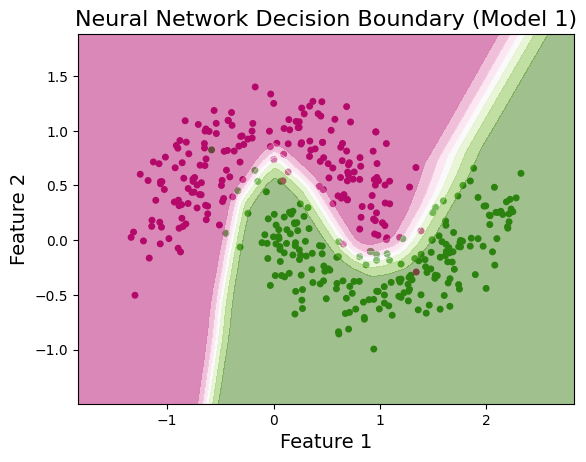

In [73]:
#(d)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.PiYG
cm_data = ListedColormap(['#b30065', '#178000'])

plt.scatter(test_X[:,0], test_X[:,1], c = test_y, cmap = cm_data,s=16)

x_min, x_max = test_X[:,0].min()-0.5, test_X[:,0].max()+0.5
y_min, y_max = test_X[:,1].min()-0.5, test_X[:,1].max()+0.5

h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_pred = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_pred = Z_pred.reshape(xx.shape)
plt.contourf(xx, yy, Z_pred, cmap=cm, alpha=.5)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.title("Neural Network Decision Boundary (Model 1)", fontsize=16)
plt.show()




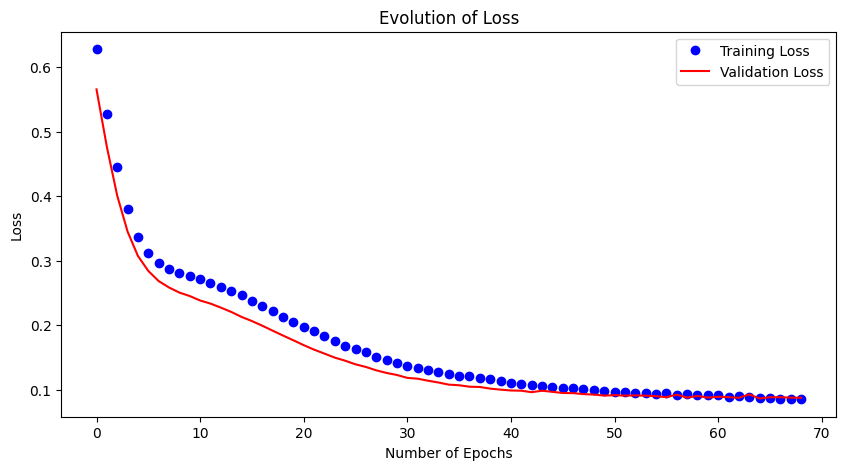

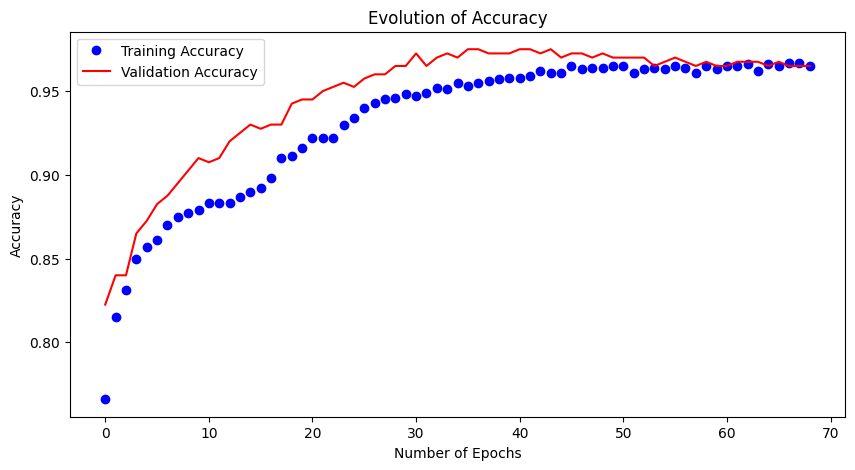

In [74]:
#(e)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'bo', label='Training Loss')
plt.plot(history.history['val_loss'], 'r', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Evolution of Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], 'bo', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Evolution of Accuracy')
plt.legend()
plt.show()


Epoch 1/100
16/16 [==============================] - 1s 20ms/step - loss: 0.6923 - accuracy: 0.5240 - val_loss: 0.6819 - val_accuracy: 0.7425
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.6520 - val_loss: 0.6680 - val_accuracy: 0.7800
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.7440 - val_loss: 0.6524 - val_accuracy: 0.7850
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6436 - accuracy: 0.8050 - val_loss: 0.6308 - val_accuracy: 0.7975
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6208 - accuracy: 0.8090 - val_loss: 0.6107 - val_accuracy: 0.7950
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5974 - accuracy: 0.8000 - val_loss: 0.5823 - val_accuracy: 0.8025
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5698 - accuracy: 0.8080 - val_loss: 0.5508 - val_accuracy: 0.8075
Epoch 8/100


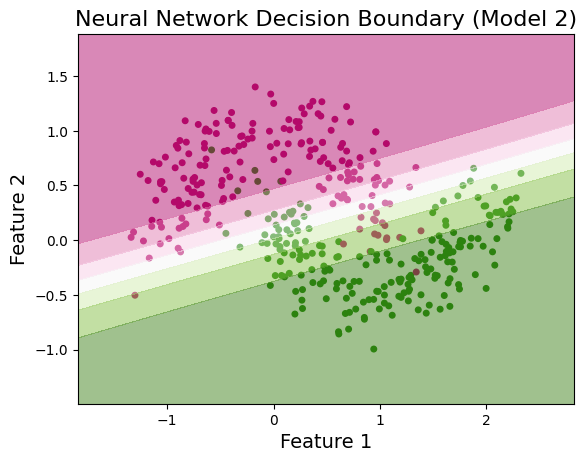

In [75]:
#(f)
model2 = Sequential()
model2.add(Dense(100, activation='sigmoid', input_shape=(2,)))
model2.add(Dense(25, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(train_X, train_y, batch_size=64, epochs=100, validation_data=(test_X, test_y), callbacks=[early_stopping])

plt.scatter(test_X[:,0], test_X[:,1], c = test_y, cmap = cm_data,s=16)
plt.title("Model 2")

x_min, x_max = test_X[:,0].min()-0.5, test_X[:,0].max()+0.5
y_min, y_max = test_X[:,1].min()-0.5, test_X[:,1].max()+0.5

h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_pred = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_pred = Z_pred.reshape(xx.shape)
plt.contourf(xx, yy, Z_pred, cmap=cm, alpha=.5)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.title("Neural Network Decision Boundary (Model 2)", fontsize=16)
plt.show()

# 3) Precision or recall
### (1 point)

Invent a new (i.e. not yet exisiting) machine learning classifier, one that you would like to use in **your personal** daily life. Would you rather want a high precision, recall, or do they matter both? 



**ANSWER**

I want to invent a new machine learning classifier that is called "Daily Life Priority Classifier." It would be trained on a person's personal data such as emails, meetings, and to-do lists to predict the priority of each item for the user. It would take into account factors such as deadlines(emergence), relationships with the email senders(importance) to determine the priority of each item. The goal of this classifier would be to provide a balance of high precision and recall, so that important tasks are not missed and less important items are not given too much attention. In this case, both precision and recall would matter equally since missing an important task could have negative results, while wasting too much time on some low priority tasks would be also not desirable.

# 4) Demonstration of the universal approximation theorem
### (4.5 points)


**(a)**  Write a function which computes $f(x)=0.2 + 0.4 \;x^2 + 0.3 \;x\; sin(9x)$. Create a vector x_train which contains 10000 evenly spaced points between 0 and 1. Compute the vector y_train = f(x_train). Plot y_train versus x_train. This is the function we want to approximate with a neural network containing one hidden layer. (*1 point*)

**(b)**  Create a neural network with one input neuron, a hidden layer with 50 neurons and sigmoid activation and one output neuron with linear activation. Choose Mean Squared Error as loss function and Adam(learning_rate=0.005) as gradient descent method. Train the model with a batch size of 2000 for 4000 epochs. (We do not need test data in this demonstration.)

After training the network make a prediction using x_train and plot this prediction together with y_train (i.e. the function the network tries to approximate). (*2 points*)

**(c)**  Plot the evolution of the loss function with a logarithmic y-axis. Then re-initialize the network (!) and rerun the training with the learning rate for Adam set to 0.002. Plot again the evolution of the loss function-
Describe in one sentence how this curve has changed.  
(*1.5 points*)

**ANSWER**

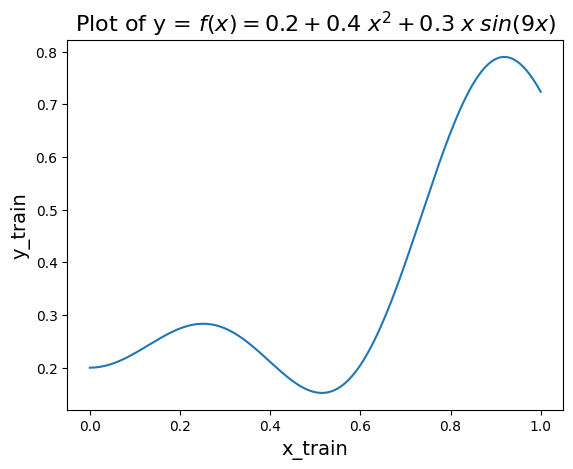

In [76]:
#(a)
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 0.2 + 0.4 * (x**2) + 0.3 * x * np.sin(9*x)

x_train = np.linspace(0, 1, 10000)
y_train = f(x_train)

plt.plot(x_train, y_train)
plt.xlabel('x_train', fontsize=14)
plt.ylabel('y_train', fontsize=14)
plt.title('Plot of y = $f(x)=0.2 + 0.4 \;x^2 + 0.3 \;x\; sin(9x)$', fontsize=16)
plt.show()


Epoch 1/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.3867
Epoch 2/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 3/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.1355
Epoch 4/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 5/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 6/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.0605
Epoch 7/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.0435
Epoch 8/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.0401
Epoch 9/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 10/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 11/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 12/4000
5/5 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 13/4000
5/5 [==============================

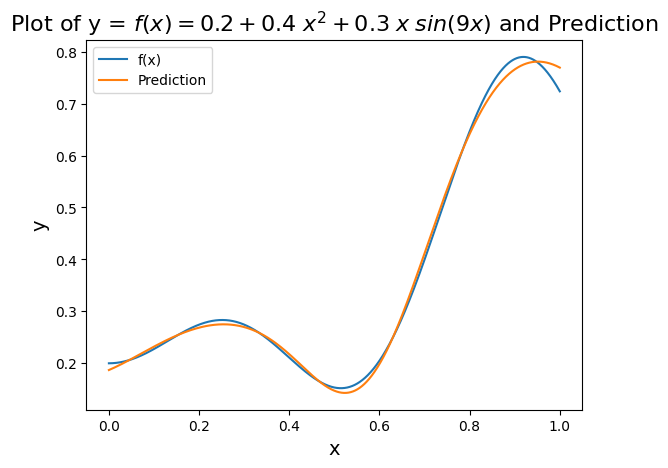

In [77]:
#(b)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def f(x):
    return 0.2 + 0.4 * (x**2) + 0.3 * x * np.sin(9*x)

x_train = np.linspace(0, 1, 10000)
y_train = f(x_train)

model = Sequential()
model.add(Dense(50, activation='sigmoid', input_shape=(1,)))
model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.005))


history = model.fit(x_train, y_train, batch_size=2000, epochs=4000, verbose=1)


y_pred = model.predict(x_train)


plt.plot(x_train, y_train, label='f(x)')
plt.plot(x_train, y_pred, label='Prediction')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Plot of y = $f(x)=0.2 + 0.4 \;x^2 + 0.3 \;x\; sin(9x)$ and Prediction', fontsize=16)
plt.legend()
plt.show()


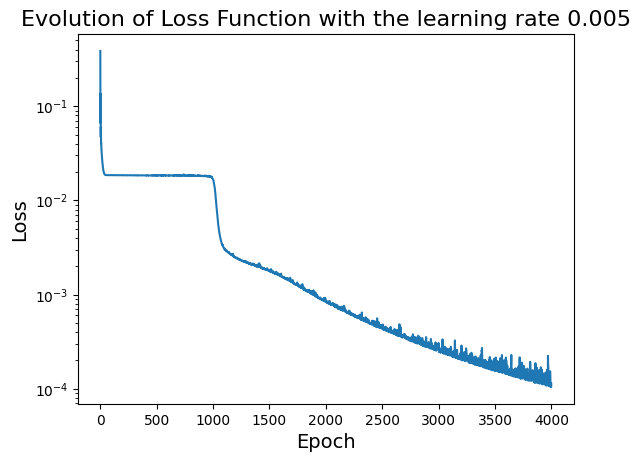

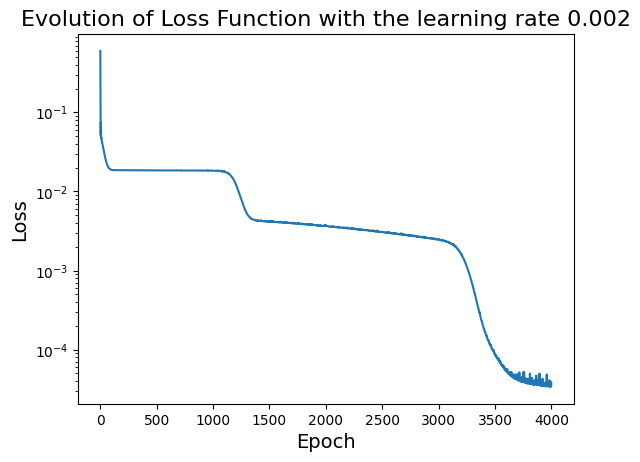

In [78]:

plt.plot(history.history['loss'])
plt.yscale('log')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Evolution of Loss Function with the learning rate 0.005', fontsize=16)
plt.show()


model = Sequential()
model.add(Dense(50, activation='sigmoid', input_shape=(1,)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.002))
history = model.fit(x_train, y_train, batch_size=2000, epochs=4000, verbose=0)


plt.plot(history.history['loss'])
plt.yscale('log')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Evolution of Loss Function with the learning rate 0.002', fontsize=16)
plt.show()


We can see that the second curve (learning rate 0.002) has changed to be more gradually decreasing compared to the first one (learning rate 0.005), which means that the network was able to converge more slowly but more stably with the lower learning rate.